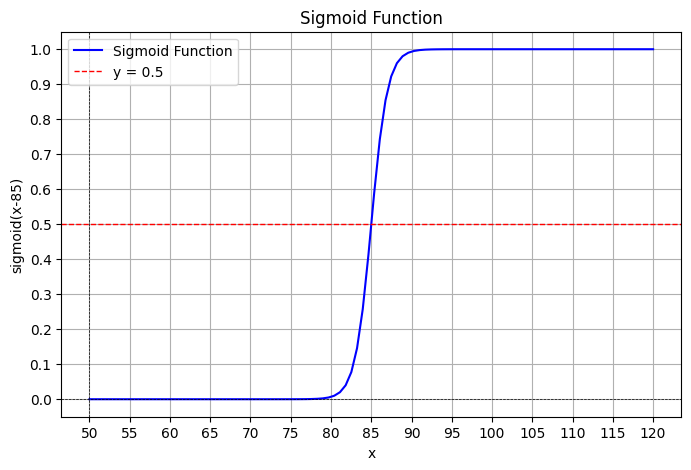

In [32]:
# sigmoid

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values
x = np.linspace(50, 120, 100)
y = sigmoid(x-85) # shift value 85 = (50+120)/2

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x-85)')
plt.xticks(np.arange(50, 125, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(50, color='black', lw=0.5, ls='--') # update x-tray to 50 
plt.axhline(0.5, color='red', lw=1, ls='--', label='y = 0.5') # mean 
plt.grid()
plt.legend()
plt.show()


Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/seamasyang/projects/azurekb/az_kb_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


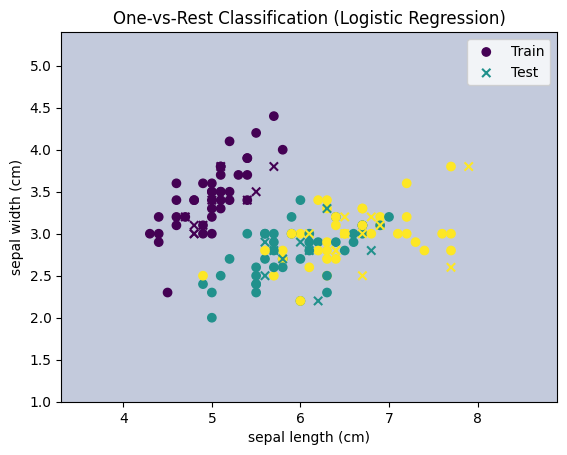

In [33]:
# multiple class : one-vs-rest 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a One-vs-Rest logistic regression classifier
ovr_classifier = LogisticRegression(multi_class='ovr', max_iter=200)

# Fit the model on the training data
ovr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ovr_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the decision boundaries (for the first two features)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = ovr_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.title('One-vs-Rest Classification (Logistic Regression)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


In [34]:
# multi class - svm 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# Sample dataset
data = {
    "question_id": [1010, 1020, 1030, 1040],
    "question": [
        "forgot password",
        "laptop cannot restart normally",
        "entitled annual leave",
        "how to apply sick leave"
    ],
    "category": ["ITS", "ITS", "HR", "HR"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df['question']
y = df['category']

# Text vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(kernel='linear')  # Using a linear kernel
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[0 0]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

          HR       0.00      0.00      0.00       0.0
         ITS       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/seamasyang/projects/azurekb/az_kb_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seamasyang/projects/azurekb/az_kb_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seamasyang/projects/azurekb/az_kb_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie